In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
df = pd.read_csv("Netflix Dataset.csv")

In [65]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [66]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 2


In [67]:
df = df.drop_duplicates()

In [68]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [69]:
print("\nNull values per column:\n", df.isnull().sum())


Null values per column:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [70]:
df = df.fillna("Unknown")

In [71]:
print("\nNull values per column:\n", df.isnull().sum())


Null values per column:
 Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64


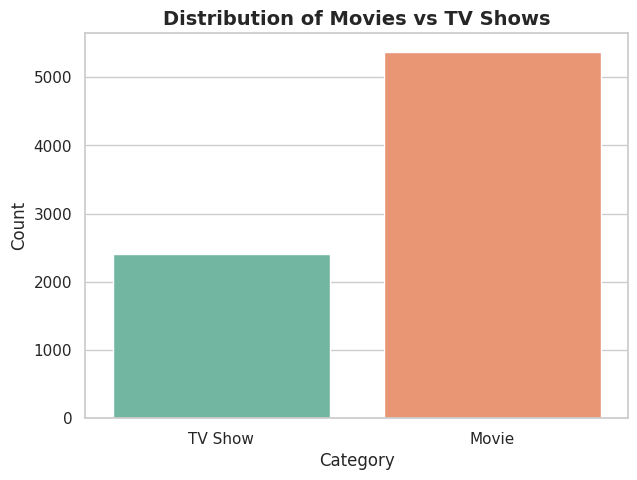

In [72]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Category", palette="Set2")
plt.title("Distribution of Movies vs TV Shows", fontsize=14, fontweight="bold")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


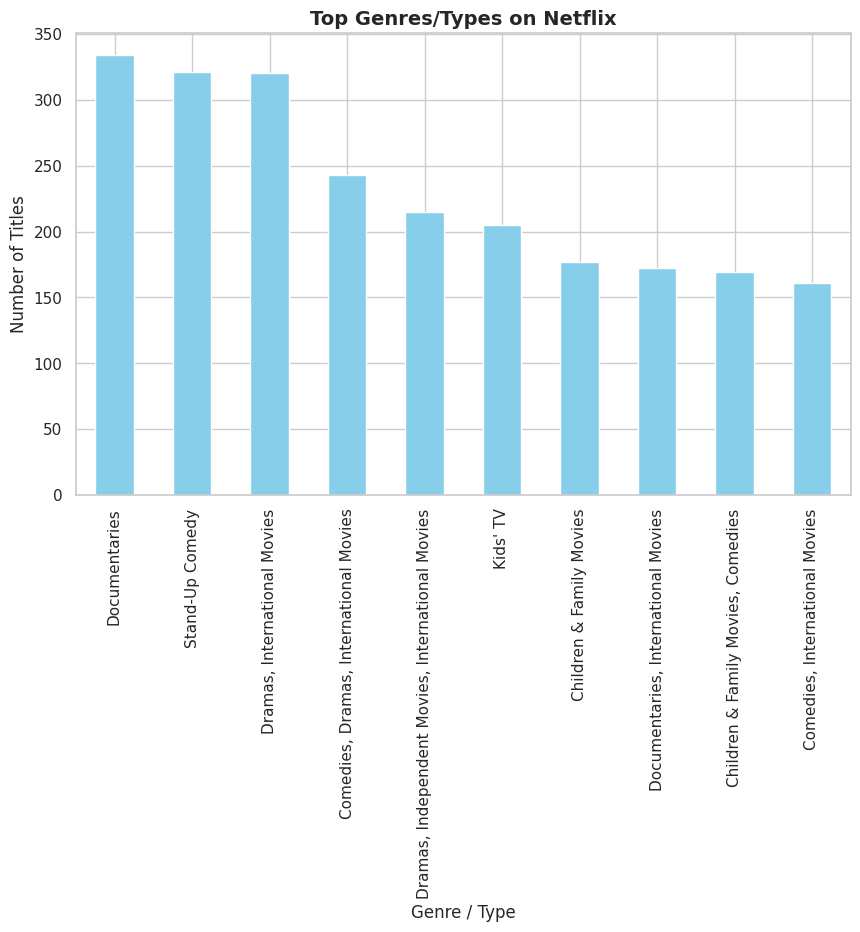

In [73]:
plt.figure(figsize=(10,6))
df['Type'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top Genres/Types on Netflix", fontsize=14, fontweight="bold")
plt.xlabel("Genre / Type")
plt.ylabel("Number of Titles")
plt.show()


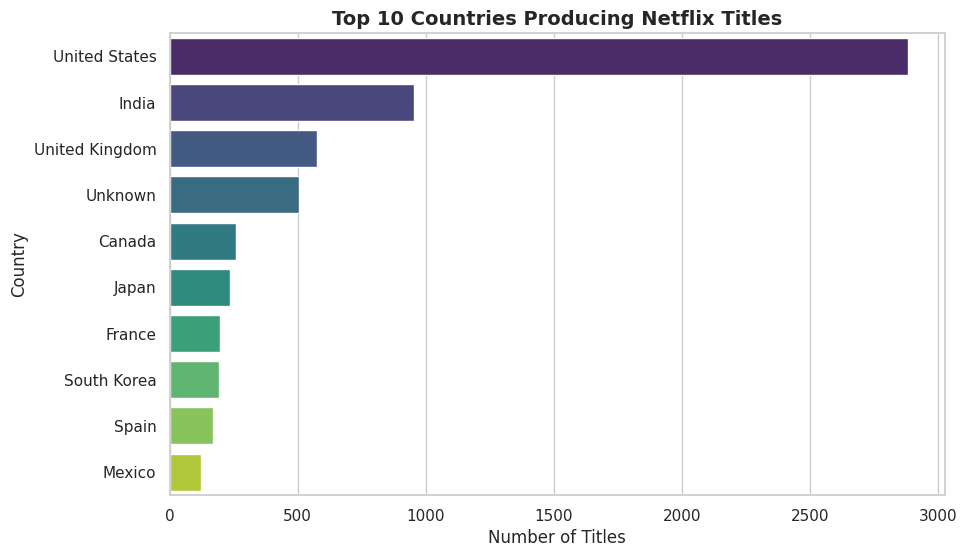

In [74]:
df['Country'] = df['Country'].fillna('Unknown')
df['Main_Country'] = df['Country'].apply(lambda x: x.split(',')[0])

top_countries = df['Main_Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries Producing Netflix Titles", fontsize=14, fontweight="bold")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


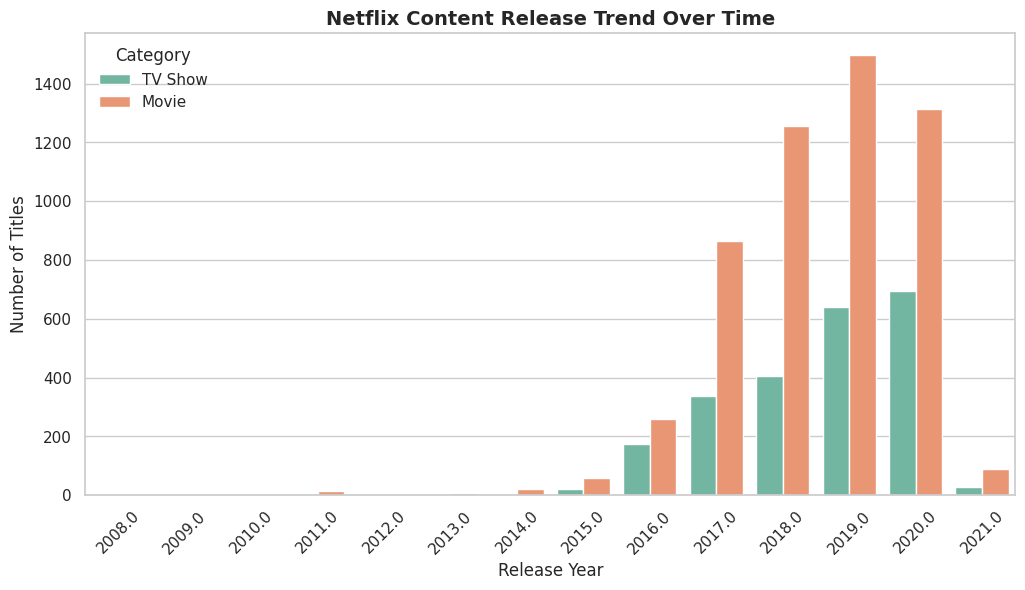

In [75]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', hue='Category', palette='Set2')
plt.title("Netflix Content Release Trend Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()
